# Fraudulent Prescriber - Opioid Trends
In my current position at HealthFirst, I must work with large clinical claims datasets for various nuances and one such important factor is Opiate usage. Though I haven’t directly worked on such data yet, I have been assigned to various projects and presentations topics related to clinical Fraud, Waste and Abuse (FWA). This is a wonderful opportunity to work on something that brings more value to my role at HF. I have selected the dataset that has scope for analysis on Fraudulent Prescriber trends and hopefully vital information on opioids. I believe this will help me in applying the knowledge gained through this DA course to real time issues at hand. 

In [1]:
#Imported required libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns


In [2]:
 #Data source is loaded here on Colab
df = pd.read_csv('/content/sample_data/Medicare_Part_D_Prescribers_by_Provider_2019.csv') 
df.head()

,PRSCRBR_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_MI,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Ent_Cd,Prscrbr_St1,Prscrbr_St2,Prscrbr_City,...,Bene_Male_Cnt,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,M,I,900 Seton Dr,NaN,Cumberland,...,96.0,130.0,73.0,NaN,NaN,0.0,NaN,56.0,158.0,2.708114
1,1003000142,Khalil,Rashid,NaN,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,...,96.0,162.0,92.0,NaN,19.0,0.0,NaN,157.0,125.0,1.856453
2,1003000167,Escobar,Julio,E,DDS,M,I,5 Pine Cone Rd,NaN,Dayton,...,21.0,48.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,1.140737
3,1003000175,Reyes-Vasquez,Belinda,NaN,D.D.S.,F,I,322 N Azusa Ave Ste 202,NaN,La Puente,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.764182
4,1003000282,Blakemore,Rosie,K,FNP,F,I,Tennessee Prison For Women,3881 Stewarts Lane,Nashville,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.156650


In [3]:
df.columns

Index(['PRSCRBR_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_MI', 'Prscrbr_Crdntls', 'Prscrbr_Gndr', 'Prscrbr_Ent_Cd',
       'Prscrbr_St1', 'Prscrbr_St2', 'Prscrbr_City', 'Prscrbr_State_Abrvtn',
       'Prscrbr_State_FIPS', 'Prscrbr_zip5', 'Prscrbr_RUCA',
       'Prscrbr_RUCA_Desc', 'Prscrbr_Cntry', 'Prscrbr_Type',
       'Prscrbr_Type_src', 'Tot_Clms', 'Tot_30day_Fills', 'Tot_Drug_Cst',
       'Tot_Day_Suply', 'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms',
       'GE65_Tot_30day_Fills', 'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply',
       'GE65_Bene_Sprsn_Flag', 'GE65_Tot_Benes', 'Brnd_Sprsn_Flag',
       'Brnd_Tot_Clms', 'Brnd_Tot_Drug_Cst', 'Gnrc_Sprsn_Flag',
       'Gnrc_Tot_Clms', 'Gnrc_Tot_Drug_Cst', 'Othr_Sprsn_Flag',
       'Othr_Tot_Clms', 'Othr_Tot_Drug_Cst', 'MAPD_Sprsn_Flag',
       'MAPD_Tot_Clms', 'MAPD_Tot_Drug_Cst', 'PDP_Sprsn_Flag', 'PDP_Tot_Clms',
       'PDP_Tot_Drug_Cst', 'LIS_Sprsn_Flag', 'LIS_Tot_Clms', 'LIS_Drug_Cst',
       'NonLIS_Sprsn_

In [4]:
#Checking for Null values
df.isnull().sum()

PRSCRBR_NPI                   0
Prscrbr_Last_Org_Name         0
Prscrbr_First_Name            1
Prscrbr_MI               339832
Prscrbr_Crdntls           75275
                          ...  
Bene_Race_Natind_Cnt     305489
Bene_Race_Othr_Cnt       723027
Bene_Dual_Cnt            430390
Bene_Ndual_Cnt           430390
Bene_Avg_Risk_Scre            0
Length: 85, dtype: int64

In [5]:
#Replacing all the blanks with '0' to make it viable for analysis
df= df.replace(np.nan, 0)

In [6]:
df.isnull().sum()

PRSCRBR_NPI              0
Prscrbr_Last_Org_Name    0
Prscrbr_First_Name       0
Prscrbr_MI               0
Prscrbr_Crdntls          0
                        ..
Bene_Race_Natind_Cnt     0
Bene_Race_Othr_Cnt       0
Bene_Dual_Cnt            0
Bene_Ndual_Cnt           0
Bene_Avg_Risk_Scre       0
Length: 85, dtype: int64

In [7]:
#Verifying if the columns i need for my analysis are in the suitable Datatypes
df.dtypes

PRSCRBR_NPI                int64
Prscrbr_Last_Org_Name     object
Prscrbr_First_Name        object
Prscrbr_MI                object
Prscrbr_Crdntls           object
                          ...   
Bene_Race_Natind_Cnt     float64
Bene_Race_Othr_Cnt       float64
Bene_Dual_Cnt            float64
Bene_Ndual_Cnt           float64
Bene_Avg_Risk_Scre       float64
Length: 85, dtype: object

In [26]:
df.Tot_Drug_Cst.dtypes

dtype('float64')

In [8]:
df.head()

,PRSCRBR_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_MI,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Ent_Cd,Prscrbr_St1,Prscrbr_St2,Prscrbr_City,...,Bene_Male_Cnt,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,0,M.D.,M,I,900 Seton Dr,0,Cumberland,...,96.0,130.0,73.0,0.0,0.0,0.0,0.0,56.0,158.0,2.708114
1,1003000142,Khalil,Rashid,0,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,...,96.0,162.0,92.0,0.0,19.0,0.0,0.0,157.0,125.0,1.856453
2,1003000167,Escobar,Julio,E,DDS,M,I,5 Pine Cone Rd,0,Dayton,...,21.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.140737
3,1003000175,Reyes-Vasquez,Belinda,0,D.D.S.,F,I,322 N Azusa Ave Ste 202,0,La Puente,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.764182
4,1003000282,Blakemore,Rosie,K,FNP,F,I,Tennessee Prison For Women,3881 Stewarts Lane,Nashville,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.156650


In [9]:
#To find the count of rows
row_count = df.shape[0]
row_count

1048575

In [10]:
#To find the count of columns
col_count = len(df.columns)
col_count

85

In [32]:
df.describe()

,PRSCRBR_NPI,Prscrbr_State_FIPS,Prscrbr_zip5,Prscrbr_RUCA,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,GE65_Tot_Clms,...,Bene_Male_Cnt,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.422920e+09,2.823647e+01,4.848455e+04,1.617138e+00,1.212991e+03,2.045665e+03,1.479969e+05,5.692834e+04,1.469680e+02,9.483865e+02,...,5.876166e+01,1.075922e+02,1.440284e+01,2.956281e+00,1.288921e+01,2.947867e-01,1.343870e+00,3.795188e+01,9.397232e+01,1.550696e+00
std,2.438484e+08,1.611617e+01,3.026049e+04,3.545813e+00,2.977383e+03,4.843011e+03,4.220762e+05,1.355257e+05,3.925465e+02,2.505004e+03,...,1.647543e+02,3.145296e+02,4.413671e+01,3.197443e+01,7.095871e+01,4.664964e+00,1.250479e+01,8.585267e+01,3.342755e+02,7.834602e-01
min,1.003000e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.380000e-01
25%,1.215083e+09,1.200000e+01,2.170200e+04,1.000000e+00,5.500000e+01,6.500000e+01,1.606035e+03,9.730000e+02,2.400000e+01,1.300000e+01,...,0.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.081464e+00
50%,1.427073e+09,2.800000e+01,4.522700e+04,1.000000e+00,1.990000e+02,2.437667e+02,1.061605e+04,4.735000e+03,7.100000e+01,1.270000e+02,...,2.700000e+01,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,2.500000e+01,1.355098e+00
75%,1.639242e+09,4.100000e+01,7.703000e+04,1.000000e+00,9.520000e+02,1.425033e+03,1.081089e+05,3.844600e+04,1.910000e+02,6.780000e+02,...,7.300000e+01,1.350000e+02,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,1.170000e+02,1.792659e+00
max,1.841448e+09,7.800000e+01,9.992900e+04,9.900000e+01,4.654880e+05,4.660040e+05,3.934299e+07,5.598093e+06,1.838530e+05,3.990170e+05,...,7.751000e+04,1.486280e+05,9.986000e+03,1.011400e+04,2.838500e+04,5.880000e+02,5.748000e+03,2.566000e+04,1.592810e+05,2.365335e+01


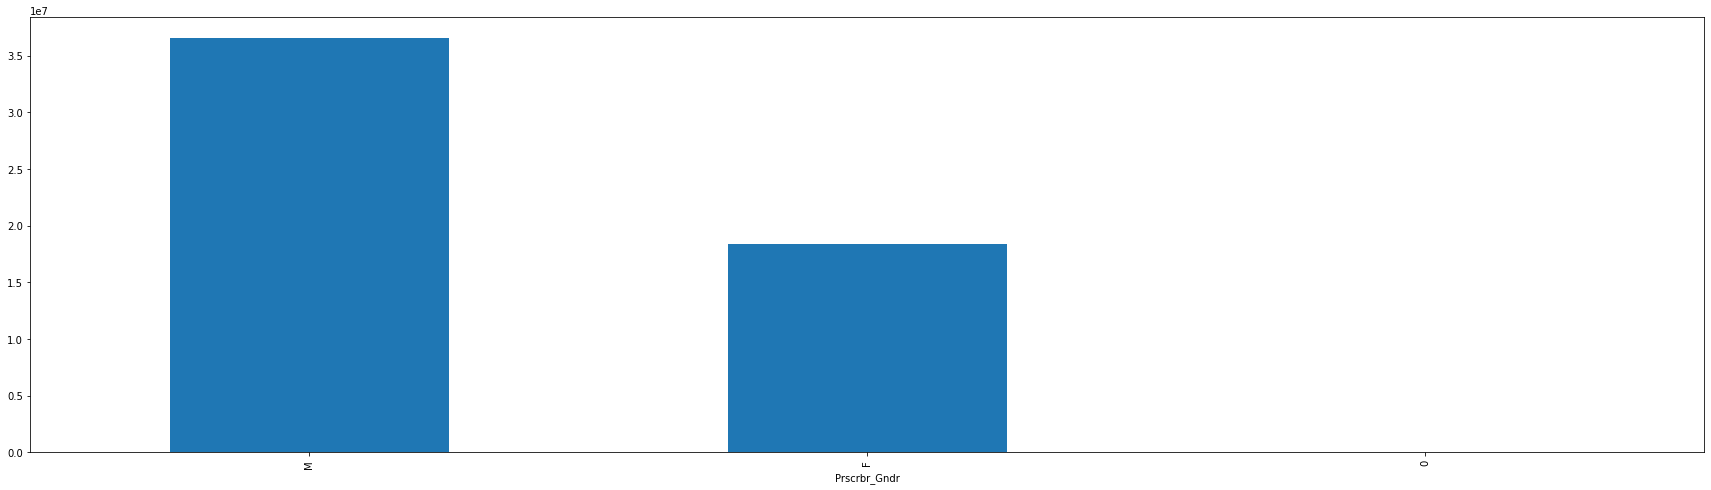

In [11]:
#Which Gender Providers are prescribing more Opioids? 
plot.figure(figsize= (30,8))
df.groupby(['Prscrbr_Gndr'])['Opioid_Tot_Clms'].sum().sort_values(ascending= False).plot(kind = "bar")

#Looks like with the data available, Male prescribers tend to prescribe higher rate of opioids

In [12]:
#Finding the percentage of opioid claims out of the total claims. 
print(float(df['Opioid_Tot_Clms'].sum())*100/(df['Tot_Clms'].sum()),"%")


4.320284480255289 %


From the above, we know that the percentage of opioid claims to total claims is 4.3 which is major given the fact that there are other types of claims as well besides to oipiods.

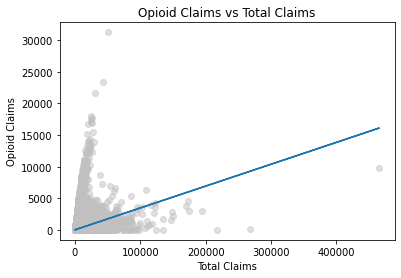

In [13]:
#Plot between Total opioid claims and Total claims
N = df['Opioid_Tot_Clms'].shape[0]
x = df['Tot_Clms']
y = df['Opioid_Tot_Clms']
colors = (192/255,192/255,192/255)

# Plot
plot.scatter(x, y, c=np.array([colors]), alpha=0.5)

#With x and y as arrays of x and y-values and deg as 1 to calculate the slope and y-intercept of the line of best fit
m, b = np.polyfit(x, y, 1) #m = slope, b = intercept
plot.plot(x, m*x + b, '-') #linestyle='-'

plot.title('Opioid Claims vs Total Claims')
plot.xlabel('Total Claims')
plot.ylabel('Opioid Claims')
plot.show()

From the above scatter plot it is evident that there are more Opioid claims around 100,000 of Total claims. This shows the ratio of Opiod claims to the Total Claims. Since i wanted a better visual at the data displayed I recreated the same in the tableau dashboard as well. 

In [14]:
#Which Prescriber Specialty/type have higher Opioid Claims? (Visualization is presented in the dhashboard for the same) 
df.groupby(['Prscrbr_Type'])['Opioid_Tot_Clms'].sum().sort_values(ascending= False)

Prscrbr_Type
Family Practice                          12554693.0
Internal Medicine                        10039665.0
Nurse Practitioner                        7594107.0
Physician Assistant                       4642809.0
Physical Medicine and Rehabilitation      2424224.0
                                            ...    
Other Medical Supply Company                    0.0
Other Clinic/Center                             0.0
Exclusive Provider Organization                 0.0
Orthotist                                       0.0
Voluntary Health or Charitable Agency           0.0
Name: Opioid_Tot_Clms, Length: 208, dtype: float64

In [28]:
#Import required modules
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

cols=[
'Tot_Clms',
'Tot_Drug_Cst',
'Tot_Benes',
'Brnd_Tot_Clms',
'Gnrc_Tot_Clms',
'LIS_Tot_Clms', 
'Opioid_Tot_Clms', 
'Opioid_LA_Tot_Clms',
'Antbtc_Tot_Clms',
'Antpsyct_GE65_Tot_Clms',
'Bene_Avg_Risk_Scre'
]

#Considering providers having >10 beneficiaries to 
df_big_prov=df[df.Tot_Benes.isna()==False]

#fill 7 for fields where <10.. not populated due to privacy
X_df=df_big_prov[cols].fillna(7)

X=X_df.values

What is the statistical behaviour of different Prescriber types/specialties and can they be grouped? according to the different types of claims and counts of patients? So I first tried to understand how many clusters can the Prescriber types be grouped into? By applying The Elbow method, The suitable K value was found to be 5.

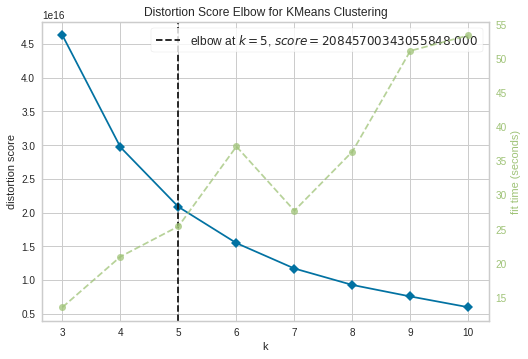

In [29]:
#Initializing the centroid
visualizer = KElbowVisualizer(KMeans(init='k-means++'), k=(3,11))
visualizer.fit(X)   # Fit the data to the visualizer
visualizer.show()

In [30]:
#The point at which the elbow shape is created is 5 and our K value i.e, optimal number of clusters is 5.
#Now let’s train the model on the dataset with a no of clusters = 5.
kmeans = KMeans(n_clusters=5, init='k-means++').fit(X)
#kmeans.predict(X)
df_c=pd.DataFrame(kmeans.cluster_centers_,columns=cols)

In [31]:
print(df_c)

#To study whClustered data with higher counts of Different types of claims and their respective Costs. 
#I built a visualization in tableau based on these clusters data.

       Tot_Clms  Tot_Drug_Cst    Tot_Benes  Brnd_Tot_Clms  Gnrc_Tot_Clms  \
0   4652.524523  4.762024e+05   397.129778     696.329628    3863.368382   
1  14689.828025  7.317127e+06  2335.343949    5507.998726    8697.456051   
2   7818.931492  1.325935e+06   518.195812    1406.865782    6229.716223   
3    440.375346  3.283227e+04    94.040623      47.444324     372.714146   
4   7862.094042  3.109400e+06   551.705236    1822.235330    5741.808908   

   LIS_Tot_Clms  Opioid_Tot_Clms  Opioid_LA_Tot_Clms  Antbtc_Tot_Clms  \
0   1807.942241       176.578379           22.143284       120.300764   
1   9645.811465       347.266242           37.575796       232.113376   
2   3863.228042       286.598598           33.358243       183.147254   
3    171.657873        25.040363            2.139234        32.807158   
4   4982.269485       264.241800           33.951249       168.852242   

   Antpsyct_GE65_Tot_Clms  Bene_Avg_Risk_Scre  
0               32.489015            1.556043  
1       

In [ ]:
#Further Visualizatio has been carried out in Tableau. Downloading and saving the file to CSV. I used the same file in Tableau to build 
#other visualizations
df_big_prov.to_csv('clusters.csv')

# Preliminary Analysis: 
I have used python to pre process the data set that i am using. I cleaned it to remove any nulls and checked for datatypes as well. I have chosen the columns that are vital for my analysis. I researched the ratios, grouped data using clusters. I downloaded this cleaned dataset and used in Tableau for my further analysis.  